In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

<html>
    <head><b>ABOUT DATASET</b></head>
    <body>
        <br>
        <br>
        Telco Churn Dataset contains 21 features and 7034 examples. Out of 21 features 18 contains either boolean or text value and the rest 3 contains numeric values which are <i>tenure</i>, <i>MonthlyCharges</i> and <i>TotalCharges</i>.
    </body>
</html>

In [68]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<html><b>Divided the dataset separately for 'Male' and 'Female' customers.</b><br>Removed the customer ID column.</html>

In [69]:
df.drop(['customerID'], axis = 1, inplace = True)
df_male = df[df['gender'] == 'Male'].reset_index(drop = True)
df_female = df[df['gender'] == 'Female'].reset_index(drop = True)

In [70]:
df_male.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [71]:
df_female.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
4,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [72]:
male_nonSenior = len(df_male[df_male['SeniorCitizen'] == 0])
female_nonSenior = len(df_female[df_female['SeniorCitizen'] == 0])
male_senior = len(df_male[df_male['SeniorCitizen'] == 1])
female_Senior = len(df_female[df_female['SeniorCitizen'] == 1])
print("Number of male non-senior citizens : " + str(male_nonSenior)) #number of male non-senior citizens
print("Number of female non-senior citizens : " + str(female_nonSenior)) #number of female non-senior citizens
print("Number of male senior citizens : " + str(male_senior)) #number of male senior citizens
print("Number of female senior citizens : " + str(female_Senior)) #number of female senior citizens

Number of male non-senior citizens : 2981
Number of female non-senior citizens : 2920
Number of male senior citizens : 574
Number of female senior citizens : 568


Plot showing the count of customers who are 'Female non-senior', 'Female senior','Male non-senior', 'Male senior'


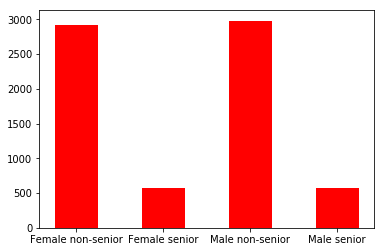

In [113]:
print("Plot showing the count of customers who are 'Female non-senior', 'Female senior','Male non-senior', 'Male senior'")
plt.bar(['Male non-senior','Female non-senior','Male senior','Female senior'],[male_nonSenior,female_nonSenior,male_senior,female_Senior],width = 0.5, color = 'red')
plt.show()

The above graphs interprets that the number of Female non-senior and Male non-senior citizens are nearly same and are much larger than the number of senior citizens.

In [74]:
df_male_monthlyCharges = df_male[['MonthlyCharges']]
df_female_monthlyCharges = df_female[['MonthlyCharges']]

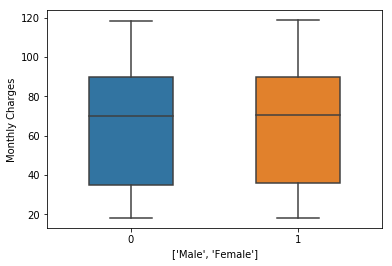

The median, maximum and minimum monthly charges spent by both male and female customers turns out to almost same.


In [114]:
gender = ['Male','Female']
sns.boxplot(data = [df_male_monthlyCharges,df_female_monthlyCharges],width = 0.5).set(xlabel = gender, ylabel = 'Monthly Charges')
plt.show()
#0 - male, 1 - female
print("The median, maximum and minimum monthly charges spent by both male and female customers turns out to almost same.")

In [76]:
df_male_onlineSecurity = df_male[['OnlineSecurity']]
df_female_onlineSecurity = df_female[['OnlineSecurity']]

In [77]:
df_male_tenure = df_male[['tenure']]
df_female_tenure = df_female[['tenure']]

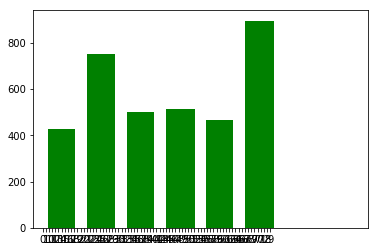

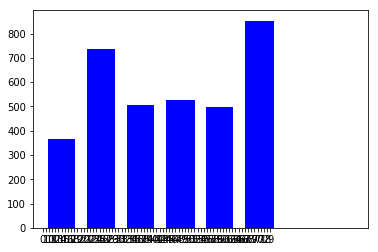

In [115]:
bins = np.linspace(0,100,9, dtype = int)
plt.hist(df_male_tenure, bins, rwidth = 0.7, color = 'g')
plt.show()
plt.hist(df_female_tenure, bins, rwidth = 0.7, color = 'b')
plt.show()

In [146]:
df_male_PaymentMethod = df_male['PaymentMethod']
df_female_PaymentMethod = df_female['PaymentMethod']
male_PaymentMethod = df_male[['PaymentMethod']]
female_PaymentMethod = df_female[['PaymentMethod']]

In [147]:
male_PaymentMethod.describe()

,PaymentMethod
count,3555
unique,4
top,Electronic check
freq,1195


In [168]:
for w in male_PaymentMethod_unique :
    print(w)

Mailed check
Bank transfer (automatic)
Credit card (automatic)
Electronic check


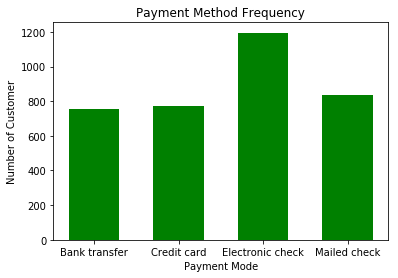

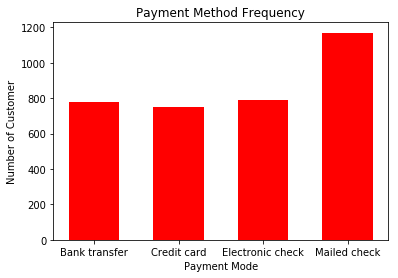

In [213]:
male_PaymentMethod_unique = df_male_PaymentMethod.unique() #same for both male and female
male_PaymentMethod = df_male[['PaymentMethod']]
female_PaymentMethod = df_female[['PaymentMethod']]

m = np.zeros(4)
f = np.zeros(4)

dict_male_PaymentMethod = {
    male_PaymentMethod_unique[0] : m[0],
    male_PaymentMethod_unique[1] : m[1],
    male_PaymentMethod_unique[2] : m[2],
    male_PaymentMethod_unique[3] : m[3]
}

dict_male_PaymentMethod = {
    female_PaymentMethod_unique[0] : f[0],
    female_PaymentMethod_unique[1] : f[1],
    female_PaymentMethod_unique[2] : f[2],
    female_PaymentMethod_unique[3] : f[3]
}

for i in range(4) :
    m[i] = int(male_PaymentMethod[male_PaymentMethod['PaymentMethod'] == male_PaymentMethod_unique[i]].count())
    f[i] = int(female_PaymentMethod[female_PaymentMethod['PaymentMethod'] == female_PaymentMethod_unique[i]].count())

plt.title('Payment Method Frequency')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customer')
plt.bar(['Mailed check','Bank transfer','Credit card','Electronic check'],[m[0],m[1],m[2],m[3]],width = 0.6, color = 'g')
plt.show()
plt.title('Payment Method Frequency')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customer')
plt.bar(['Mailed check','Bank transfer','Credit card','Electronic check'],[f[0],f[1],f[2],f[3]],width = 0.6, color = 'r')
plt.show()